Name:Deepak K<br>
Email:deepakjeff2@gmail.com

#### https://www.kaggle.com/datasets/uciml/mushroom-classification

Download dataset from above link, you will predict if mushroom is edible or not


# Classification Assignment (End-to-End)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#Data understanding
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#displaying all columns and rows
pd.set_option("display.max_rows", None, "display.max_columns", None)
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
#checking for null values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## EDA

### Univariante

Column name: class
e    4208
p    3916
Name: class, dtype: int64



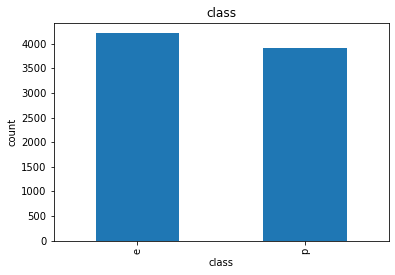

---------------------------------------------------------------------------------------
Column name: cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64



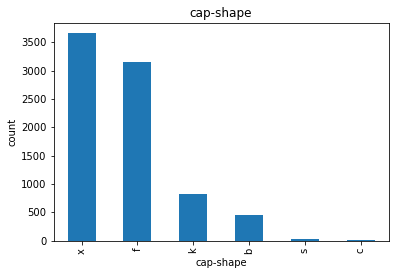

---------------------------------------------------------------------------------------
Column name: cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64



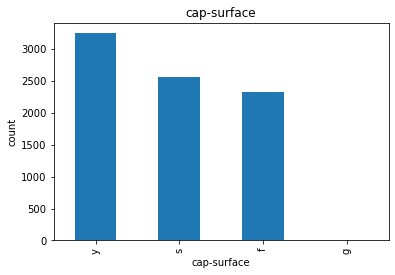

---------------------------------------------------------------------------------------
Column name: cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64



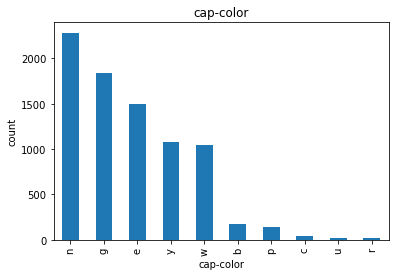

---------------------------------------------------------------------------------------
Column name: bruises
f    4748
t    3376
Name: bruises, dtype: int64



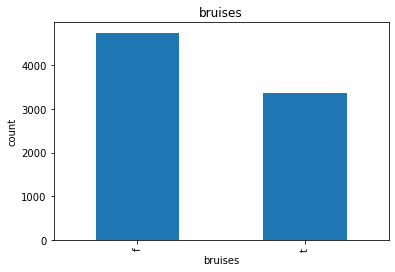

---------------------------------------------------------------------------------------
Column name: odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64



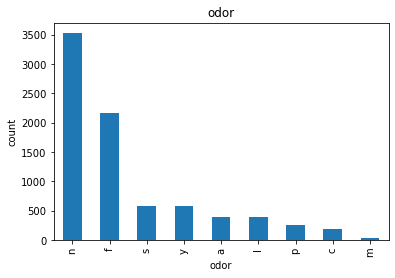

---------------------------------------------------------------------------------------
Column name: gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64



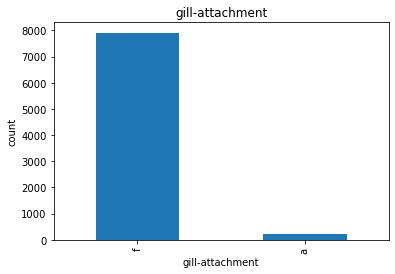

---------------------------------------------------------------------------------------
Column name: gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64



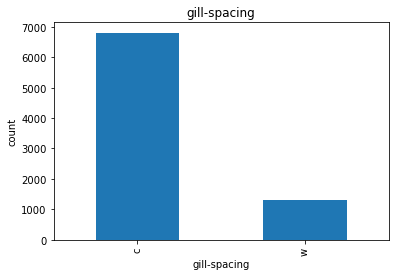

---------------------------------------------------------------------------------------
Column name: gill-size
b    5612
n    2512
Name: gill-size, dtype: int64



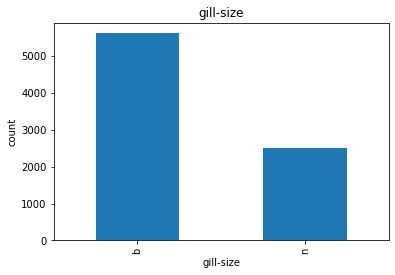

---------------------------------------------------------------------------------------
Column name: gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64



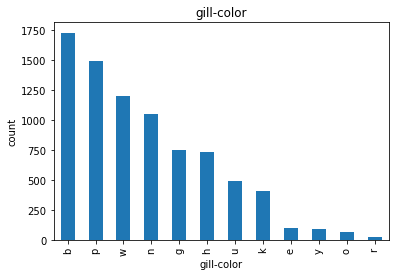

---------------------------------------------------------------------------------------
Column name: stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64



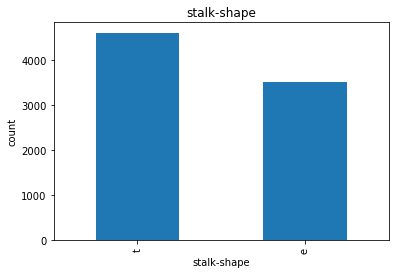

---------------------------------------------------------------------------------------
Column name: stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64



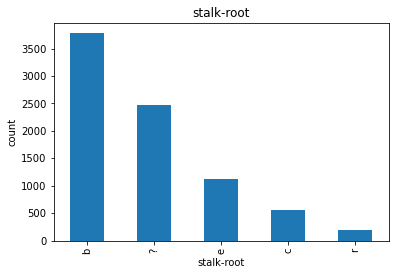

---------------------------------------------------------------------------------------
Column name: stalk-surface-above-ring
s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64



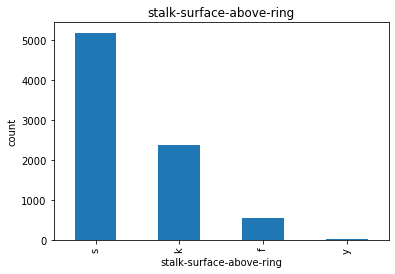

---------------------------------------------------------------------------------------
Column name: stalk-surface-below-ring
s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64



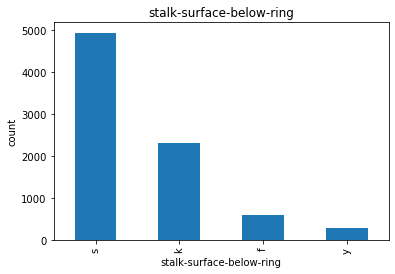

---------------------------------------------------------------------------------------
Column name: stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk-color-above-ring, dtype: int64



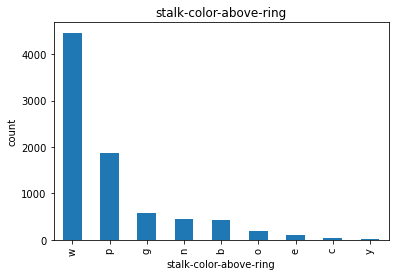

---------------------------------------------------------------------------------------
Column name: stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk-color-below-ring, dtype: int64



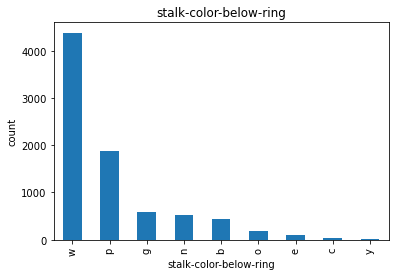

---------------------------------------------------------------------------------------
Column name: veil-type
p    8124
Name: veil-type, dtype: int64



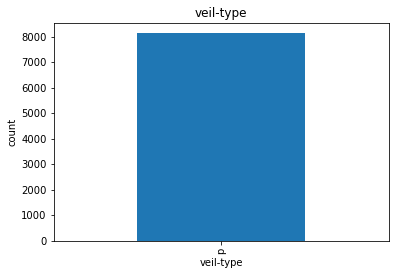

---------------------------------------------------------------------------------------
Column name: veil-color
w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64



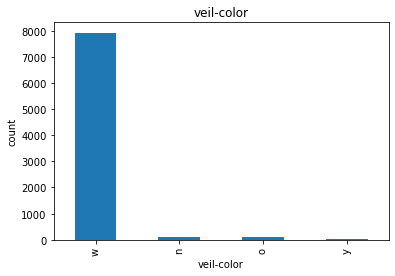

---------------------------------------------------------------------------------------
Column name: ring-number
o    7488
t     600
n      36
Name: ring-number, dtype: int64



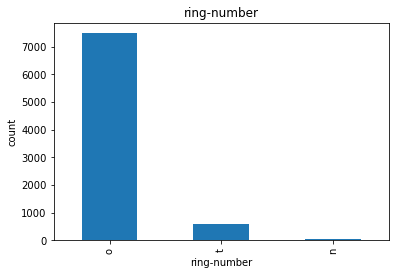

---------------------------------------------------------------------------------------
Column name: ring-type
p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64



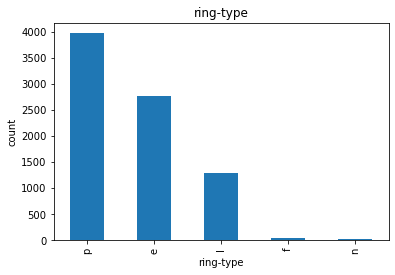

---------------------------------------------------------------------------------------
Column name: spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
b      48
u      48
o      48
y      48
Name: spore-print-color, dtype: int64



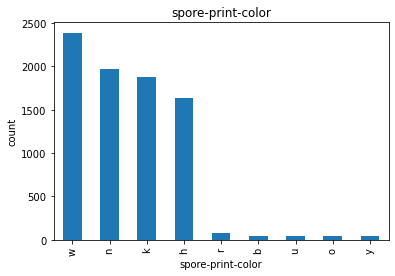

---------------------------------------------------------------------------------------
Column name: population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64



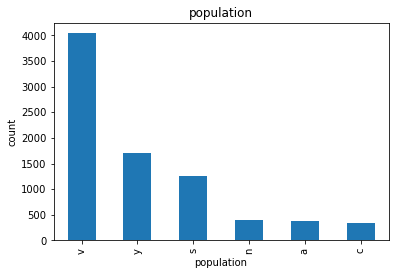

---------------------------------------------------------------------------------------
Column name: habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64



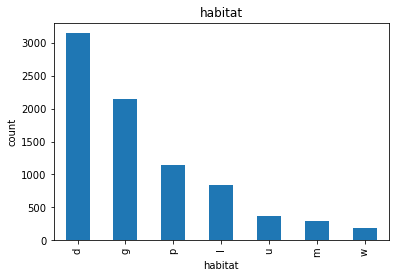

---------------------------------------------------------------------------------------


In [7]:
#since every column is categorical. plotting bar chart for all columns with value counts.
for i in data.columns:
    print('Column name:',i)
    print(data[i].value_counts()l,end='\n\n')
    data[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()
    print('---------------------------------------------------------------------------------------')
    

### Bivariante

In [8]:
#printing crosstabs for all columns
for i in data.columns:
    if i != 'class':
        print(pd.crosstab(data['class'],data[i],margins=True,values=data['class'],aggfunc=pd.Series.count),end='\n\n')
        
        print('------------------------------------------------------------------------------------------------------')

cap-shape      b    c       f      k     s       x   All
class                                                   
e          404.0  NaN  1596.0  228.0  32.0  1948.0  4208
p           48.0  4.0  1556.0  600.0   NaN  1708.0  3916
All        452.0  4.0  3152.0  828.0  32.0  3656.0  8124

------------------------------------------------------------------------------------------------------
cap-surface       f    g       s       y   All
class                                         
e            1560.0  NaN  1144.0  1504.0  4208
p             760.0  4.0  1412.0  1740.0  3916
All          2320.0  4.0  2556.0  3244.0  8124

------------------------------------------------------------------------------------------------------
cap-color      b     c       e       g       n      p     r     u       w  \
class                                                                       
e           48.0  32.0   624.0  1032.0  1264.0   56.0  16.0  16.0   720.0   
p          120.0  12.0   876.0   808.0  1

habitat       d       g      l      m       p      u      w   All
class                                                            
e        1880.0  1408.0  240.0  256.0   136.0   96.0  192.0  4208
p        1268.0   740.0  592.0   36.0  1008.0  272.0    NaN  3916
All      3148.0  2148.0  832.0  292.0  1144.0  368.0  192.0  8124

------------------------------------------------------------------------------------------------------


Column Name: cap-shape


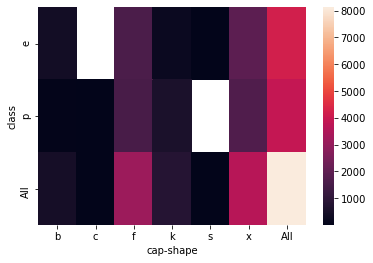

------------------------------------------------------------------------------------------------------

Column Name: cap-surface


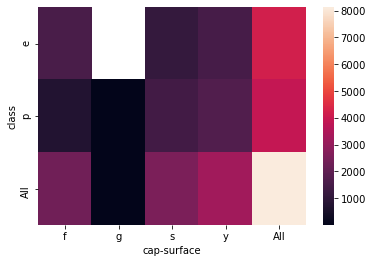

------------------------------------------------------------------------------------------------------

Column Name: cap-color


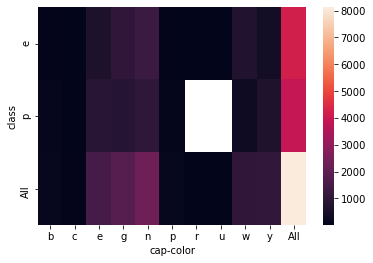

------------------------------------------------------------------------------------------------------

Column Name: bruises


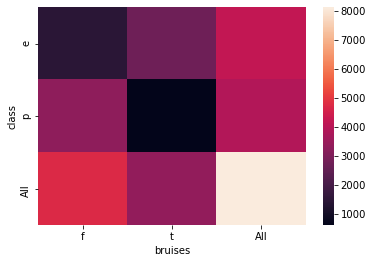

------------------------------------------------------------------------------------------------------

Column Name: odor


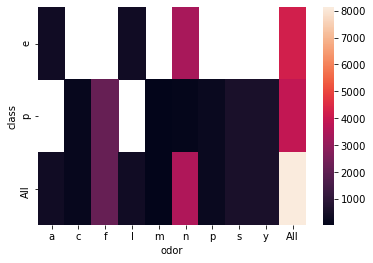

------------------------------------------------------------------------------------------------------

Column Name: gill-attachment


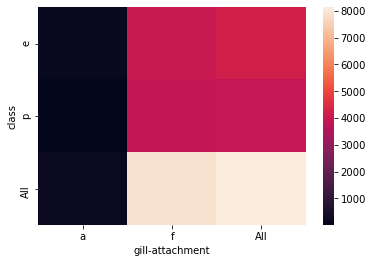

------------------------------------------------------------------------------------------------------

Column Name: gill-spacing


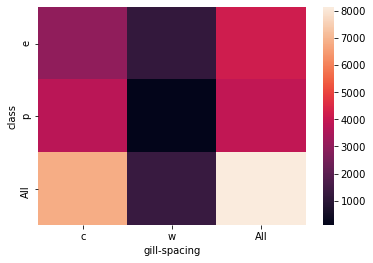

------------------------------------------------------------------------------------------------------

Column Name: gill-size


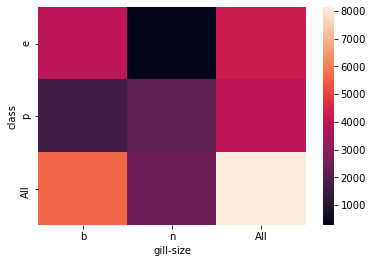

------------------------------------------------------------------------------------------------------

Column Name: gill-color


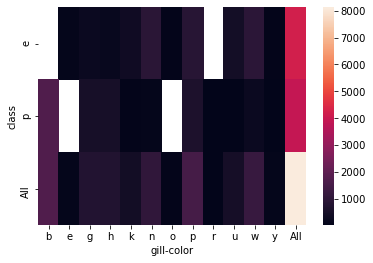

------------------------------------------------------------------------------------------------------

Column Name: stalk-shape


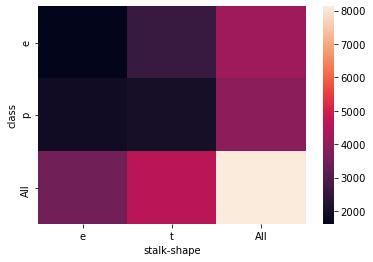

------------------------------------------------------------------------------------------------------

Column Name: stalk-root


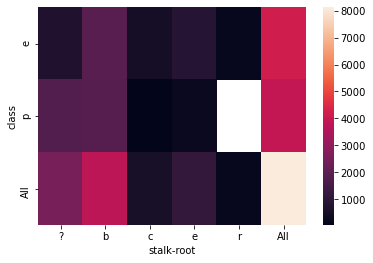

------------------------------------------------------------------------------------------------------

Column Name: stalk-surface-above-ring


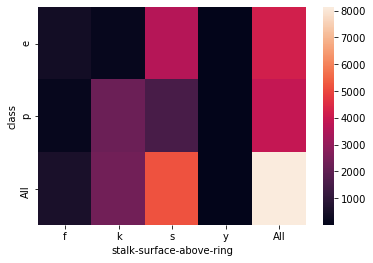

------------------------------------------------------------------------------------------------------

Column Name: stalk-surface-below-ring


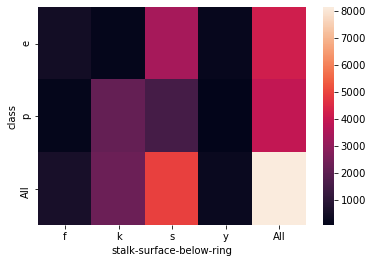

------------------------------------------------------------------------------------------------------

Column Name: stalk-color-above-ring


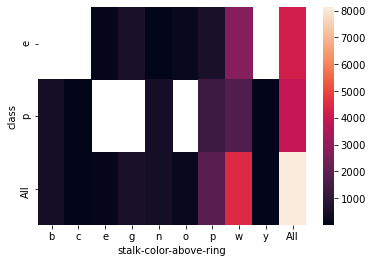

------------------------------------------------------------------------------------------------------

Column Name: stalk-color-below-ring


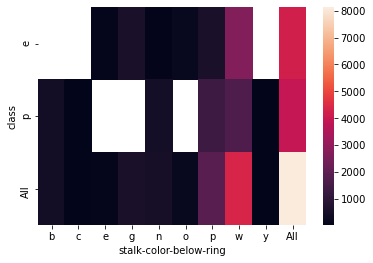

------------------------------------------------------------------------------------------------------

Column Name: veil-type


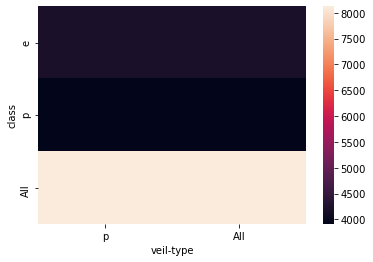

------------------------------------------------------------------------------------------------------

Column Name: veil-color


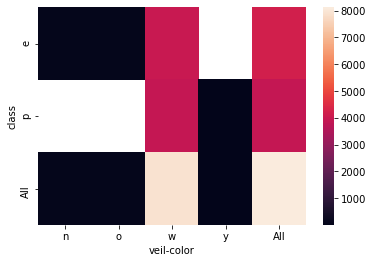

------------------------------------------------------------------------------------------------------

Column Name: ring-number


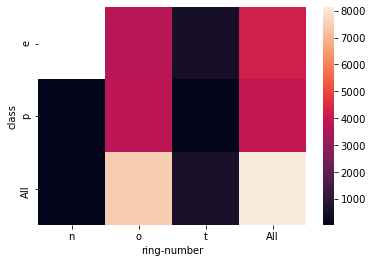

------------------------------------------------------------------------------------------------------

Column Name: ring-type


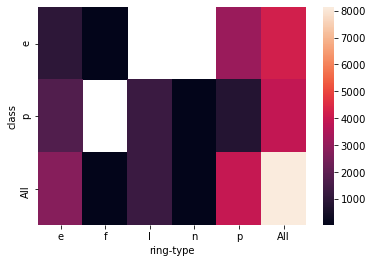

------------------------------------------------------------------------------------------------------

Column Name: spore-print-color


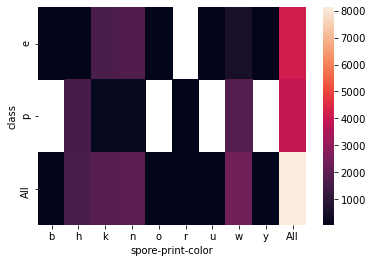

------------------------------------------------------------------------------------------------------

Column Name: population


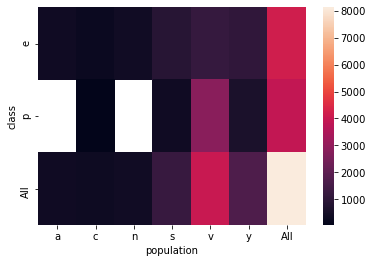

------------------------------------------------------------------------------------------------------

Column Name: habitat


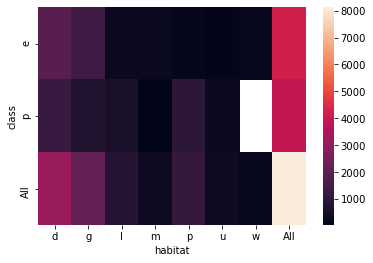

------------------------------------------------------------------------------------------------------



In [9]:
#plotting the heatmap for the crosstab.
for i in data.columns:
    if i != 'class':
        print('Column Name:',i)
        sns.heatmap(pd.crosstab(data['class'],data[i],margins=True,values=data['class'],aggfunc=pd.Series.count))
        plt.show()
        print('------------------------------------------------------------------------------------------------------',end = '\n\n')

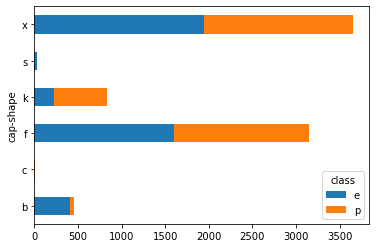

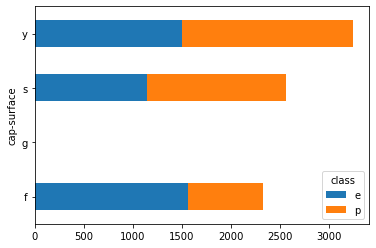

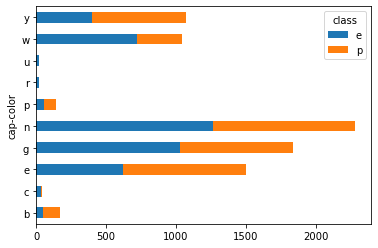

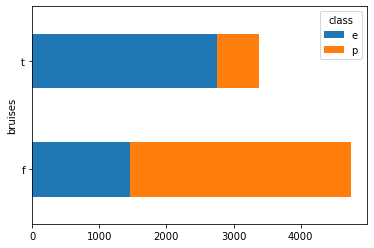

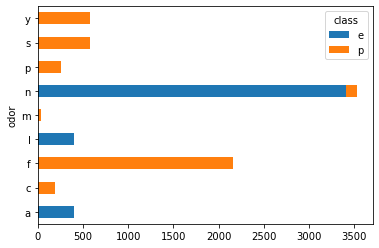

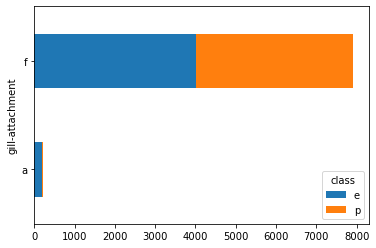

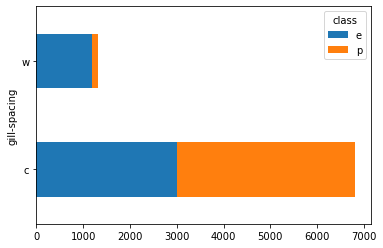

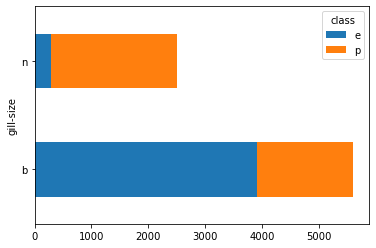

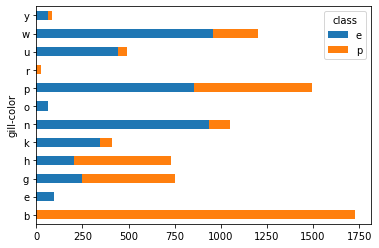

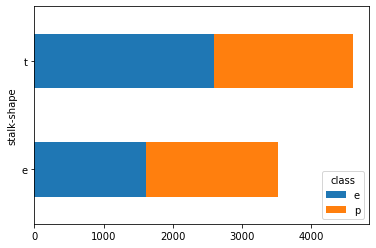

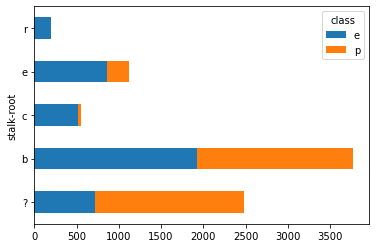

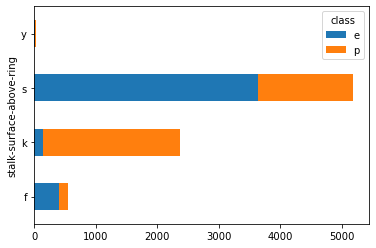

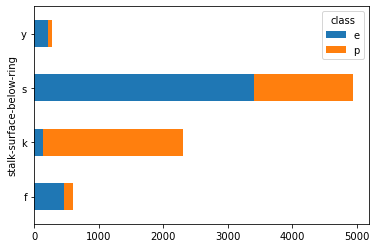

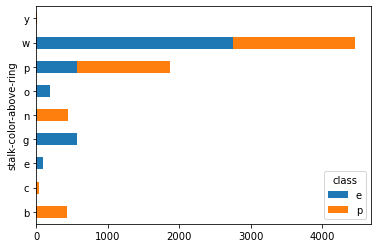

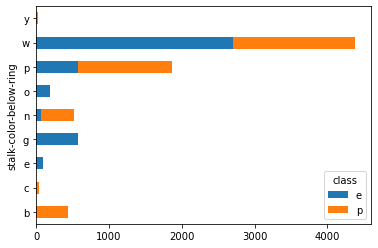

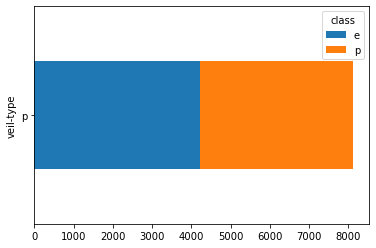

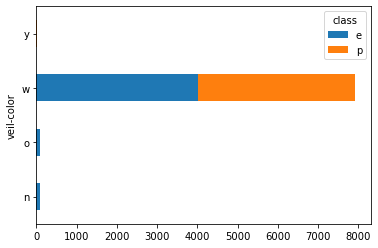

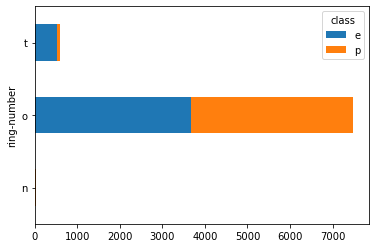

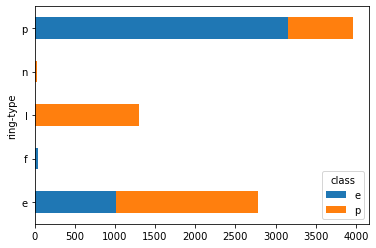

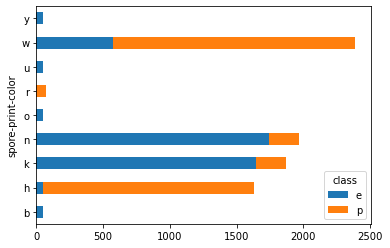

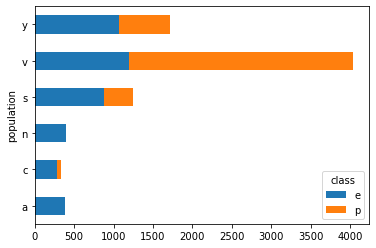

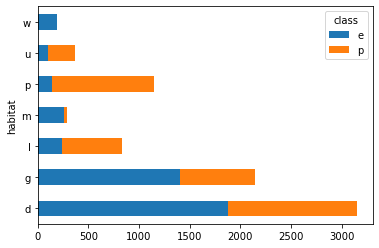

In [10]:
#plotting all independent columns with dependent column.

for i in data.columns:
    if i != 'class':
        data.pivot_table(index=i, columns='class', aggfunc='size').plot.barh(stacked=True)
        plt.show()
        

In [11]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [12]:
#derived metrics
#Since every column is categorical i could find a way create a new column

In [13]:
#encoding using LavelEncoder and print by which number the values encoded
mapping = []

encoder = LabelEncoder()

for i in data.columns:
    data[i] = encoder.fit_transform(data[i])
    mapping_dict = {index : label for index , label in enumerate(encoder.classes_)}
    mapping.append(mapping_dict)

In [14]:
mapping

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [15]:
#dividing the data into input and output
x = data.drop('class',axis=1)
y = data['class']

# Feature Engineering

In [16]:
#VIF and Feature selection methods
#create a dataframe with two columns. one column as features and another as there VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns

vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [17]:
vif_data

,Feature,VIF
0,cap-shape,5.463186
1,cap-surface,3.904712
2,cap-color,5.950600
3,bruises,7.984231
4,odor,8.918271
5,gill-attachment,256.122838
6,gill-spacing,4.534113
7,gill-size,5.758180
8,gill-color,6.284702
9,stalk-shape,9.243136


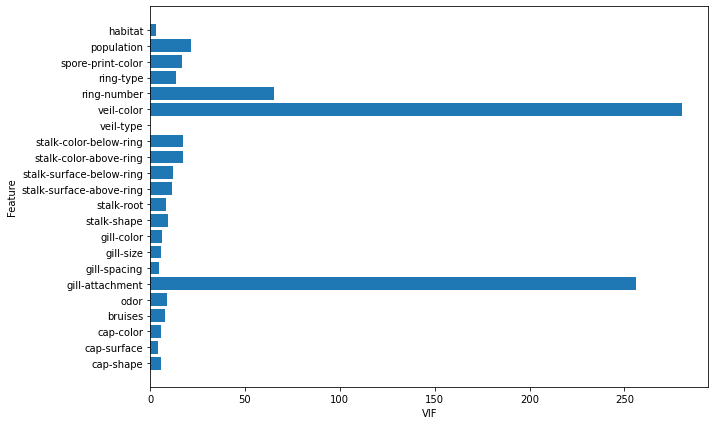

In [18]:
#plotting the VIF of each independent feature
plt.figure(figsize=(10,7))
plt.barh(vif_data['Feature'],vif_data['VIF'])
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.show()

In [19]:
#dropping column high VIF value
x.drop(['veil-color'],axis=1,inplace=True)
x.drop(['ring-number'],axis=1,inplace=True)
x.drop(['gill-attachment'],axis=1,inplace=True)

In [20]:
#mutual information
from sklearn.feature_selection import mutual_info_classif
#determining the mutual infomation
mutual_info = mutual_info_classif(x,y)
mutual_info

array([0.02695387, 0.02660552, 0.0274095 , 0.1299984 , 0.62881741,
       0.07681577, 0.16796037, 0.28737598, 0.01758392, 0.09407748,
       0.19673881, 0.18300532, 0.17245944, 0.16733995, 0.00241911,
       0.22138731, 0.33008883, 0.13424775, 0.10523816])

In [21]:
mutual_info = pd.Series(mutual_info) #converting into series
mutual_info.index = x.columns #adding columns
mutual_info.sort_values(ascending=False) #sorting

odor                        0.628817
spore-print-color           0.330089
gill-color                  0.287376
ring-type                   0.221387
stalk-surface-above-ring    0.196739
stalk-surface-below-ring    0.183005
stalk-color-above-ring      0.172459
gill-size                   0.167960
stalk-color-below-ring      0.167340
population                  0.134248
bruises                     0.129998
habitat                     0.105238
stalk-root                  0.094077
gill-spacing                0.076816
cap-color                   0.027409
cap-shape                   0.026954
cap-surface                 0.026606
stalk-shape                 0.017584
veil-type                   0.002419
dtype: float64

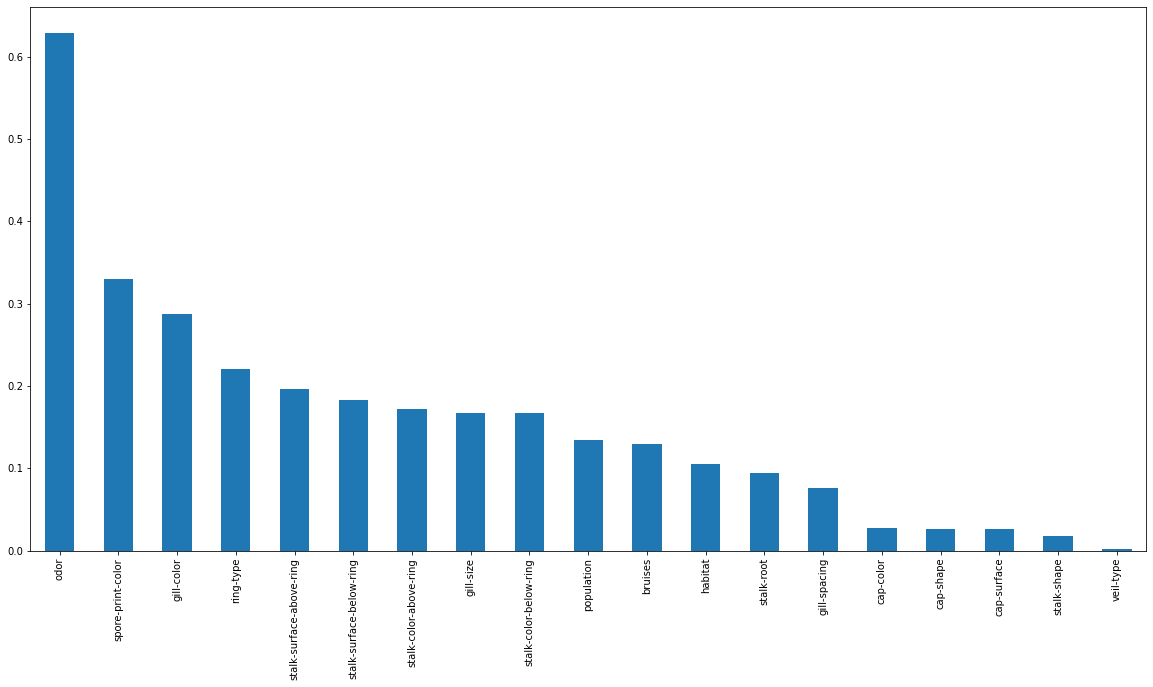

In [22]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,10)) #plotting the same thing
plt.show()

In [23]:
from sklearn.feature_selection import SelectKBest

# to select top 10 features
top_ten_cols = SelectKBest(mutual_info_classif,k=10)
top_ten_cols.fit(x,y)
top_ten = x.columns[top_ten_cols.get_support()]

In [24]:
x = x[top_ten]
x.head()

,odor,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population
0,6,1,4,2,2,7,7,4,2,3
1,0,0,4,2,2,7,7,4,3,2
2,3,0,5,2,2,7,7,4,3,2
3,6,1,5,2,2,7,7,4,2,3
4,5,0,4,2,2,7,7,0,3,0


In [25]:
#Data splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.head()

,odor,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population
7434,5,0,7,2,2,7,7,4,7,3
7725,5,0,2,2,2,7,7,4,7,2
783,3,0,5,2,2,7,7,4,2,3
1928,5,0,3,2,0,7,7,0,2,3
7466,8,1,0,2,1,7,6,0,7,4


# Model building

In [26]:
'''
Logistic Regression
naive bayes classifier
SVC classifier
Decision Tree Classifier
Random forest classifier
'''

'\nLogistic Regression\nnaive bayes classifier\nSVC classifier\nDecision Tree Classifier\nRandom forest classifier\n'

In [40]:
#importing the models and initializing them
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
nb = GaussianNB()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [41]:
#fitting the training data to the models
lr.fit(x_train,y_train)
nb.fit(x_train,y_train)
svc.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier()

# Metrics

In [42]:
#create a Data Frame showing metrics of above models
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#create a function which takes model as input and will return a list with following scores
def models_metrics(model):
    lis = []
    lis.append(accuracy_score(y_test,model.predict(x_test)))
    lis.append(recall_score(y_test,model.predict(x_test)))
    lis.append(precision_score(y_test,model.predict(x_test)))
    lis.append(f1_score(y_test,model.predict(x_test)))
    lis.append(roc_auc_score(y_test,model.predict(x_test)))

    return lis

#create a dataframe with models and their scores
Metrics_df = pd.DataFrame()
models = []
Metrics_df["Metrics"] = ['accuracy_score','recall_score','precision_score','f1_score','roc_auc_score']
Metrics_df['Logistic Regression'] = models_metrics(lr)
Metrics_df['Naives Bayes'] = models_metrics(nb)
Metrics_df['SVC'] = models_metrics(svc)
Metrics_df['Decision Tree'] = models_metrics(dt)
Metrics_df['Random Forest'] = models_metrics(rf)

Metrics_df

,Metrics,Logistic Regression,Naives Bayes,SVC,Decision Tree,Random Forest
0,accuracy_score,0.905846,0.894154,0.960615,1.0,1.0
1,recall_score,0.888745,0.860285,0.958603,1.0,1.0
2,precision_score,0.911141,0.912209,0.958603,1.0,1.0
3,f1_score,0.899804,0.885486,0.958603,1.0,1.0
4,roc_auc_score,0.905053,0.892584,0.960522,1.0,1.0


### explain which model does it better 

According the metrics above the Decision Tree and Random Forest models are the best they have 100% score in every metrics we checked 

# GridSearch CV

In [32]:
# implement grid search for the best model, recommend best hyperparameters
#create a grid for 5 models with different parameters
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    }   
}

In [35]:
#applying grid search on the above mentioned grid and printing the dataframe with the model and there best score and respective best parameters
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.913372,{'C': 5}
1,naive_bayes_gaussian,0.902446,{}
2,svm,1.000000,"{'C': 10, 'kernel': 'rbf'}"
3,decision_tree,1.000000,{'criterion': 'gini'}
4,random_forest,1.000000,{'n_estimators': 1}
